Importing dependencies

In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt

API login

In [ ]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

Importing data

In [3]:
elders = te.getWBIndicator(series_code='SP.POP.65UP.TO.ZS', output_type='df')
data = te.getIndicatorData(country='all', indicators=['coronavirus deaths', 'population'], output_type='df')
covid_deaths = data[data['Category']=='Coronavirus Deaths']
population = data[data['Category']=='Population']

Data manipulation

In [4]:
elders = elders[['country', 'last']].rename(columns={'last': 'Elders (% of total)', 'country': 'Country'}).set_index('Country')
covid_deaths = covid_deaths[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Deaths'}).set_index('Country')
population = population[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Population'}).set_index('Country')
df = covid_deaths.join(elders).join(population)
df['Deaths per 10.000 people'] = df['Deaths']/(df['Population']*100)
df = df[['Deaths per 10.000 people', 'Elders (% of total)']]
df.dropna(inplace=True)
df.sort_values(['Deaths per 10.000 people', 'Elders (% of total)'], ascending=False, inplace=True)
df = df.head(20)
df

,Deaths per 10.000 people,Elders (% of total)
Country,,
Belgium,15.949389,19.00657
Peru,11.328308,8.39348
Italy,11.136514,23.01214
Spain,10.352791,19.64782
Slovenia,10.307692,20.18628
Bosnia and Herzegovina,10.089080,17.20115
United Kingdom,9.910278,18.50870
Montenegro,9.903226,15.38917
Czech Republic,9.397004,19.80074


Plotting

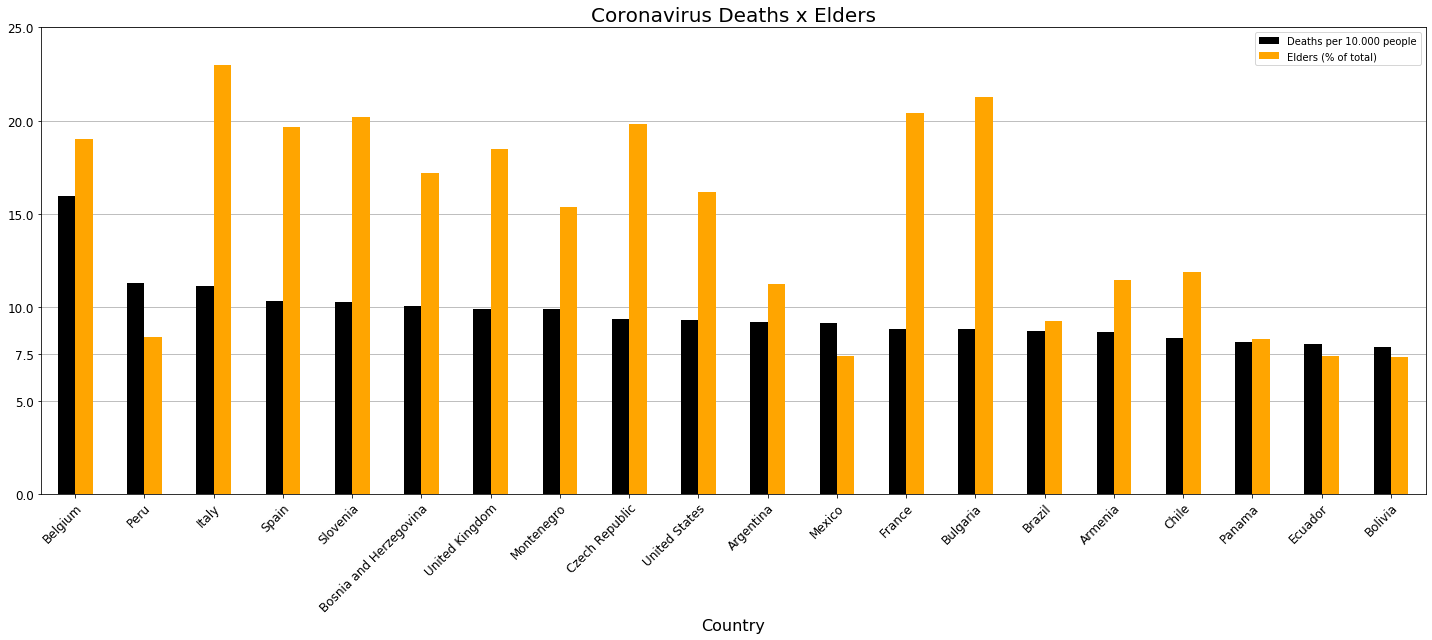

In [5]:
color_dict = {'Elders (% of total)': 'orange', 'Deaths per 10.000 people': 'black'}

df.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

plt.yticks(list(plt.yticks()[0]) + [7.5])
ax.yaxis.grid(zorder=0)
ax.set_title('Coronavirus Deaths x Elders', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()